## Random Forest

### Configuración

#### Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from collections import Counter

### **¿Qué es?**

El algoritmo **Random Forest** es un método de ensamblado basado en la combinación de varios árboles de decisión para tomar la decisión sobre cómo predecir el valor de la variable target, mejorando con esto la precisión y reduciendo el riesgo de sobreajuste (overfitting).

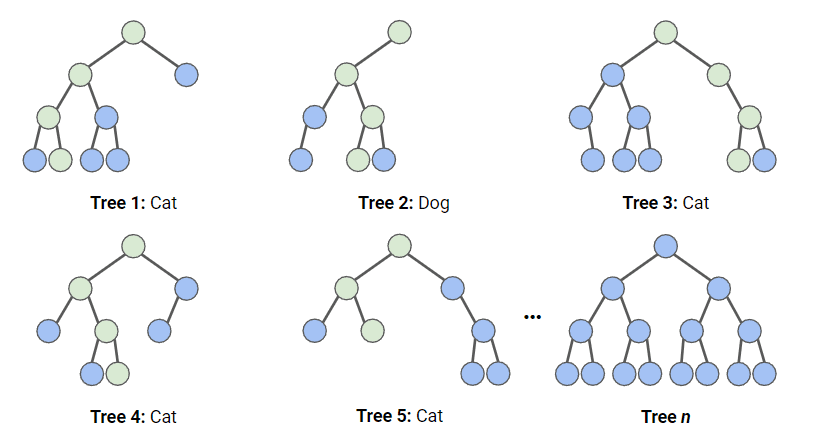

Imagen extraída desde aquí: https://www.datacamp.com/tutorial/random-forests-classifier-python

### **Mecanica de cálculo del Algoritmo Random Forest**

#### **Algoritmo explicado paso a paso**

**Paso 1: Preparar el Dataset**

- Dado un dataset con varias características (columnas) y una variable objetivo (target), se inicia con la preparación de los datos.
- Para cada árbol del bosque, se crea un **subconjunto del dataset original** utilizando muestreo con reemplazo (**bootstrap**). Esto significa que algunas muestras pueden aparecer más de una vez y otras pueden no aparecer.

**Paso 2: Crear los Árboles de Decisión**

- El Random Forest construye múltiples árboles de decisión (**n_estimators**) de forma independiente.
- Para cada nodo de cada árbol:
  1. Se selecciona un subconjunto aleatorio de características (esto se llama **feature bagging** o **submuestreo de características**).
  2. Se encuentra el mejor punto de corte (split) para dividir el nodo, utilizando solo las características seleccionadas.
  3. El criterio para el punto de corte suele ser el **índice Gini** o la **ganancia de información** (entropía).
  4. El árbol sigue creciendo hasta alcanzar el máximo nivel de profundidad permitido o hasta que no se pueda dividir más (hojas puras).

**Paso 3: Repetir el Proceso para Todos los Árboles**

- Se repite el proceso de construcción de árboles para cada uno de los árboles especificados en el Random Forest.
- Cada árbol se entrena de manera independiente usando diferentes subconjuntos de datos y diferentes subconjuntos de características.

**Paso 4: Hacer Predicciones con el Bosque**

- Para predecir la clase de una nueva muestra, el Random Forest pasa esta muestra por cada uno de los árboles.
- Cada árbol realiza una predicción (voto) basado en su estructura interna.

**Paso 5: Agregar los Resultados (Ensamblado)**

- La predicción final se determina por **votación de la mayoría** (para clasificación). La clase que recibe más votos es la clase predicha.
- Para problemas de regresión, la predicción final es el **promedio** de las predicciones de todos los árboles.


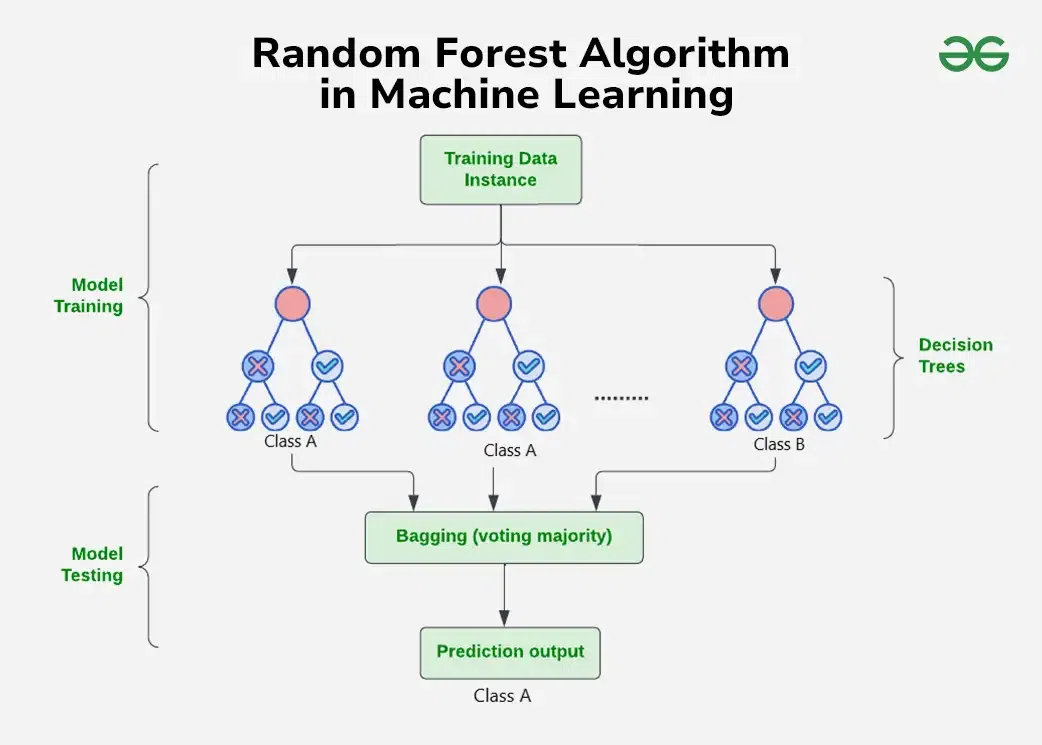

imagen extraída de este artículo : https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

#### **Ejemplo del paso a paso en código**

##### **Entrenamiento**

In [2]:
# Cargar el dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Seleccionar las dos características más importantes para la visualización
X = X[['petal length (cm)', 'petal width (cm)']]

# División del dataset en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configuraciones del Random Forest
n_trees = 10
n_samples = X_train.shape[0]

# Lista para almacenar los árboles
forest = []

# Construcción manual del Random Forest
for i in range(n_trees):
    # Paso 1: Muestreo Bootstrap (con reemplazo) del conjunto de entrenamiento
    bootstrap_indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    # Paso 2: Entrenar un árbol de decisión usando las dos características seleccionadas
    tree = DecisionTreeClassifier(random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)

    # Guardar el árbol
    forest.append(tree)

# Paso 4: Hacer predicciones con el Random Forest
def predict_random_forest(forest, X):
    predictions = []
    for tree in forest:
        # Hacer predicciones usando el árbol
        preds = tree.predict(X)
        predictions.append(preds)
    # Agregar las predicciones usando votación de mayoría
    final_predictions = np.array(predictions).T
    majority_vote = [Counter(row).most_common(1)[0][0] for row in final_predictions]
    return np.array(majority_vote)

# Hacer predicciones en el conjunto de prueba
y_pred = predict_random_forest(forest, X_test)

# Evaluar la precisión
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del Random Forest Manual en Conjunto de Prueba: {accuracy:.2f}")


Precisión del Random Forest Manual en Conjunto de Prueba: 1.00


##### **Visualización del primer árbol**

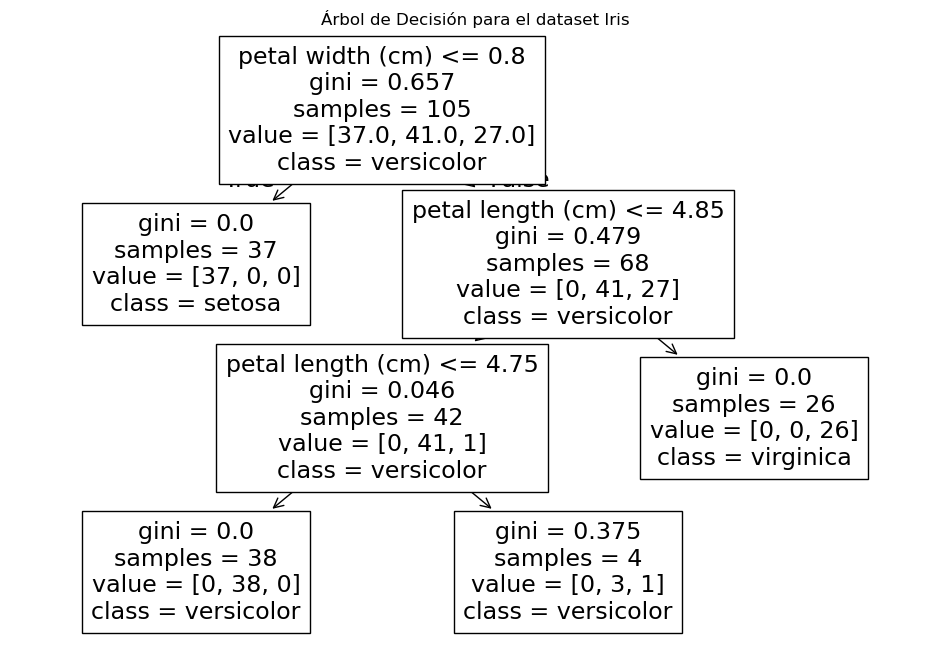

In [3]:
# Visualizar el árbol de decisión para el primer arbol
plt.figure(figsize=(12, 8))
plot_tree(forest[0], filled=False, feature_names=forest[0].feature_names_in_, class_names=iris.target_names)
plt.title("Árbol de Decisión para el dataset Iris")
plt.show()

##### **Visualización de la frontera de decisión del primer árbol apllicada sobre los datos de test**

**¿Qué es lo que veo?**

* La frontera de decisión generada por el Random Forest, con colores diferentes para cada clase.
* Los puntos de datos originales, mostrando cómo el modelo clasifica cada muestra.
* El Random Forest tiende a tener una frontera de decisión menos definida (más "suave") que un solo árbol, ya que promedia las predicciones de múltiples árboles.

<Figure size 1000x600 with 0 Axes>

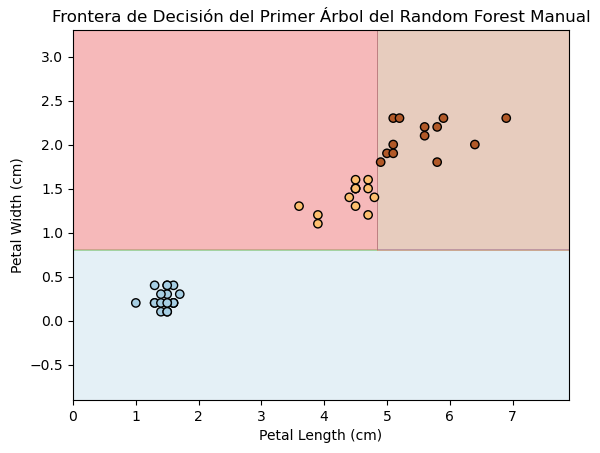

In [4]:
# Visualización de la Frontera de Decisión para el Random Forest
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(
    forest[0],  # Mostrar la frontera del primer árbol como ejemplo
    X_test,
    response_method="predict",
    grid_resolution=1000,
    cmap=plt.cm.Paired,
    alpha=0.3
)
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Frontera de Decisión del Primer Árbol del Random Forest Manual")
plt.show()

##### **Contar las repeticiones de cada clase predicha**

In [5]:
# Contar las repeticiones de cada clase predicha
pred_counts = Counter(y_pred)
# Mostrar los resultados
print("Repeticiones por valor de y_pred:")
for clase, count in pred_counts.items():
    print(f"Clase {clase}: {count} repeticiones")

Repeticiones por valor de y_pred:
Clase 1: 13 repeticiones
Clase 0: 19 repeticiones
Clase 2: 13 repeticiones


##### **Entender cómo se hace una predicción particular**

In [8]:
# Seleccionar una muestra del conjunto de prueba para analizar
sample = X_test.iloc[30].values.reshape(1, -1)
true_label = y_test.iloc[30]

# Lista para almacenar las predicciones de cada árbol
predictions = []

# Hacer predicciones usando cada árbol en el bosque
for i, tree in enumerate(forest):
    # Corregir la advertencia pasando un DataFrame con nombres de características
    preds = tree.predict(pd.DataFrame(sample, columns=X_test.columns))
    predictions.append(preds[0])
    print(f"Árbol {i + 1}: Predicción = {preds[0]}")

# Contar las predicciones de cada clase
from collections import Counter
pred_counter = Counter(predictions)
print("\nConteo de predicciones por clase:")
for clase, count in pred_counter.items():
    print(f"Clase {clase}: {count} votos")

# Aplicar votación de mayoría
majority_vote = pred_counter.most_common(1)[0][0]
print(f"\nVotación de mayoría: Clase predicha = {majority_vote}")
print(f"Clase verdadera = {true_label}")

Árbol 1: Predicción = 0
Árbol 2: Predicción = 0
Árbol 3: Predicción = 0
Árbol 4: Predicción = 0
Árbol 5: Predicción = 0
Árbol 6: Predicción = 0
Árbol 7: Predicción = 0
Árbol 8: Predicción = 0
Árbol 9: Predicción = 0
Árbol 10: Predicción = 0

Conteo de predicciones por clase:
Clase 0: 10 votos

Votación de mayoría: Clase predicha = 0
Clase verdadera = 0


### **Conceptos importantes** 

#### **Características del Algoritmo**

1. **Robustez:** El uso de múltiples árboles reduce el riesgo de sobreajuste, especialmente cuando se utilizan datos ruidosos.
2. **Muestreo con Reemplazo (Bootstrap):** Permite que cada árbol vea un conjunto diferente de datos, lo que ayuda a reducir la correlación entre los árboles.
3. **Feature Bagging:** La selección aleatoria de características en cada nodo hace que los árboles sean más variados y menos propensos a sobreajustarse al dataset original.
4. **No Necesita Normalización:** El Random Forest no requiere que los datos estén escalados o normalizados.

#### **Ventajas y Desventajas**

**Ventajas:**
- **Reducción del Sobreajuste:** El ensamblado de múltiples árboles reduce la varianza del modelo.
- **Escalabilidad:** Funciona bien con datasets grandes y de alta dimensionalidad.
- **Robustez:** Es robusto a datos faltantes y datos ruidosos.

**Desventajas:**
- **Interpretabilidad:** Al combinar múltiples árboles, se pierde la interpretabilidad que tendría un solo árbol de decisión.
- **Computación:** Puede ser computacionalmente costoso, especialmente con un gran número de árboles o características